In [1]:
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset,Dataset
from sklearn.metrics import mean_squared_error,mean_absolute_error
from torchsummary import summary

# Readme

对整个liaocheng_channel_1.csv 进行数据观察，将前340000条数据作为训练集，将[410000:480000]作为测试集

In [3]:
df = pd.read_csv("./data/liaocheng_channel_1.csv")

In [6]:
df_abc = df.loc[:, ['a_fundamental_amplitude', 'b_fundamental_amplitude', 'c_fundamental_amplitude']]

In [7]:
df_abc

,a_fundamental_amplitude,b_fundamental_amplitude,c_fundamental_amplitude
0,61.22571,61.27521,61.25516
1,61.19195,61.16975,61.20109
2,61.17517,61.22967,61.18359
3,61.21167,61.28042,61.17920
4,61.22778,61.23384,61.16817
...,...,...,...
542447,60.95070,61.01351,60.93293
542448,60.96499,61.01532,60.94312
542449,60.94435,60.99413,60.92794
542450,60.91934,60.98606,60.90964


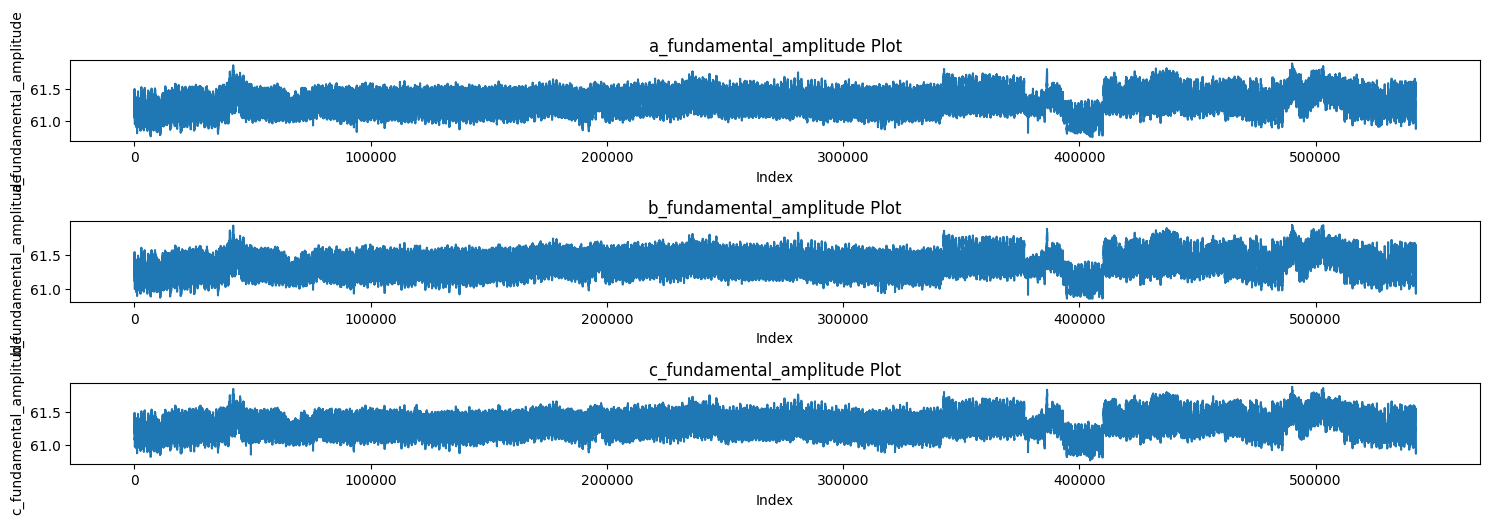

In [37]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(15, 5))

df_1 = df_abc

# 对每一列单独绘制
for i, column in enumerate(df_1.columns, 1):
    plt.subplot(3, 1, i)  # 创建 1 行 3 列的子图
    plt.plot(df_1[column])  # 使用折线图绘制每列的前 380,000 行数据
    plt.title(f'{column} Plot')  # 设置每个图的标题
    plt.xlabel('Index')  # 设置 x 轴标签
    plt.ylabel(column)  # 设置 y 轴标签

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

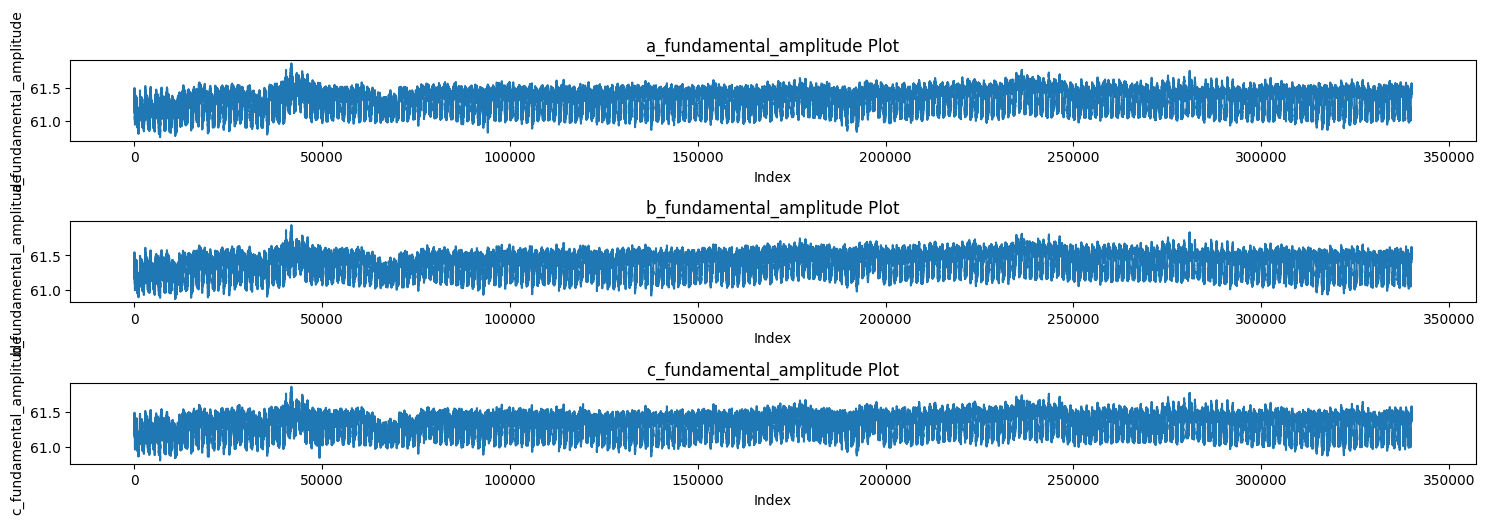

In [32]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(15, 5))

# 选择前 380,000 行数据
df_1 = df_abc[:340000]

# 对每一列单独绘制
for i, column in enumerate(df_1.columns, 1):
    plt.subplot(3, 1, i)  # 创建 1 行 3 列的子图
    plt.plot(df_1[column])  # 使用折线图绘制每列的前 380,000 行数据
    plt.title(f'{column} Plot')  # 设置每个图的标题
    plt.xlabel('Index')  # 设置 x 轴标签
    plt.ylabel(column)  # 设置 y 轴标签

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

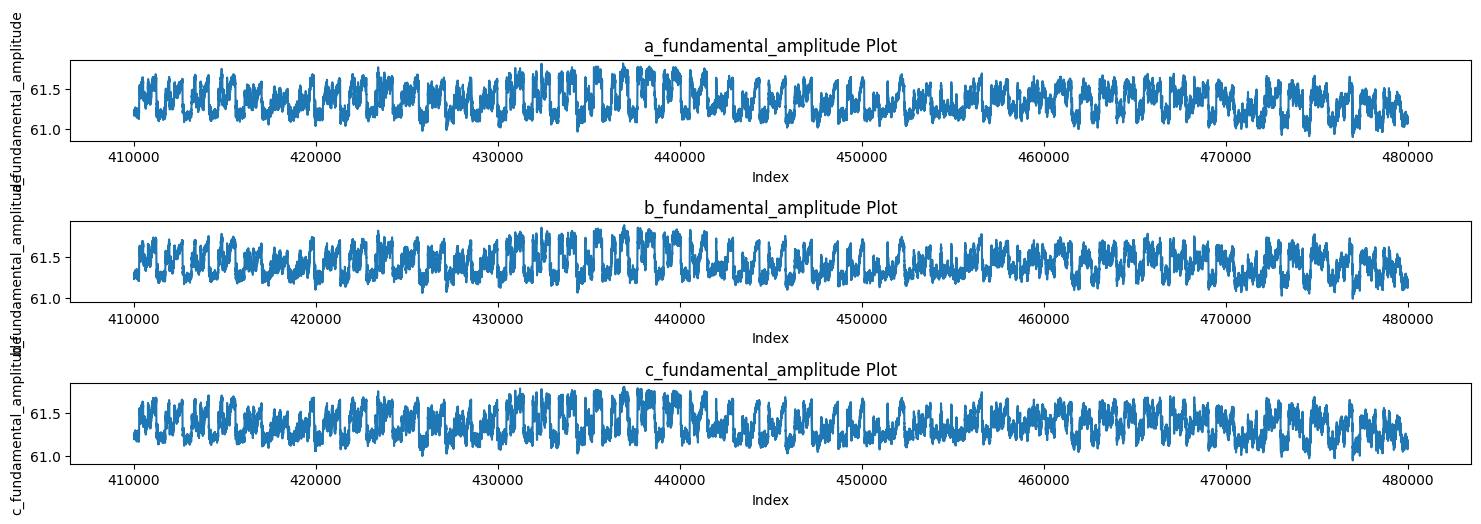

In [36]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(15, 5))

# 选择前 380,000 行数据
df_1 = df_abc[410000:480000]

# 对每一列单独绘制
for i, column in enumerate(df_1.columns, 1):
    plt.subplot(3, 1, i)  # 创建 1 行 3 列的子图
    plt.plot(df_1[column])  # 使用折线图绘制每列的前 380,000 行数据
    plt.title(f'{column} Plot')  # 设置每个图的标题
    plt.xlabel('Index')  # 设置 x 轴标签
    plt.ylabel(column)  # 设置 y 轴标签

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

In [29]:
df_1 = df_abc[:340000]

In [30]:
df_2 = df_abc[410000:480000]

In [33]:
df_1.to_csv("./data/train.csv",index=False)

In [34]:
df_2.to_csv("./data/test.csv",index=False)